### Trends Over Time: 

#### Analyze job postings over time to identify trends in hiring. Are there particular months or seasons with increased job postings?

In [1]:
import pandas as pd

# Load the datasets
postings = pd.read_csv('updated_data\postings.csv')
companies = pd.read_csv('updated_data\company.csv')
company_industries = pd.read_csv('updated_data\company_industries.csv')
company_specialities = pd.read_csv('updated_data\company_specialities.csv')
employee_counts = pd.read_csv('updated_data\employee_counts.csv')
salaries = pd.read_csv('updated_data\salaries.csv')
job_skills = pd.read_csv('updated_data\Job_skills.csv')
job_industries = pd.read_csv('updated_data\job_industries.csv')


In [15]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                35564 non-null  int64  
 1   company_name          35564 non-null  object 
 2   title                 35564 non-null  object 
 3   description           35564 non-null  object 
 4   pay_period            35564 non-null  object 
 5   location              35564 non-null  object 
 6   company_id            35564 non-null  int64  
 7   views                 35564 non-null  int64  
 8   formatted_work_type   35564 non-null  object 
 9   applies               35564 non-null  int64  
 10  original_listed_time  35564 non-null  object 
 11  remote_allowed        35564 non-null  bool   
 12  job_posting_url       35564 non-null  object 
 13  expiry                35564 non-null  object 
 14  listed_time           35564 non-null  object 
 15  work_type          

In [2]:
postings = postings.astype({
    'job_id': 'int32',
    'company_name': 'string',    # Use 'string' for modern text processing (like VARCHAR)
    'title': 'string',
    'description': 'string',
    'pay_period': 'string',
    'location': 'string',
    'company_id': 'int32',
    'views': 'int32',
    'formatted_work_type': 'string',
    'applies': 'int32',
    'job_posting_url': 'string',
    'work_type': 'string',
    'normalized_salary': 'float',
    'zip_code': 'string',
    'fips': 'int32'
})

#### **Extract Monthly Data:** Create a new column for the month and year of each job posting.


In [32]:
postings.head(3)

,job_id,company_name,title,description,pay_period,location,company_id,views,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,expiry,listed_time,work_type,normalized_salary,zip_code,fips,month_year
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458,20,Full-time,2,2024-04-17 23:45:08,False,https://www.linkedin.com/jobs/view/921716/?trk...,2024-05-17 23:45:08,2024-04-17 23:45:08,FULL_TIME,38480.0,8540.0,34021,2024-04
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719,8,Full-time,0,2024-04-16 14:26:54,False,https://www.linkedin.com/jobs/view/10998357/?t...,2024-05-16 14:26:54,2024-04-16 14:26:54,FULL_TIME,55000.0,45202.0,39061,2024-04
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262,16,Full-time,0,2024-04-12 04:23:32,False,https://www.linkedin.com/jobs/view/23221523/?t...,2024-05-12 04:23:32,2024-04-12 04:23:32,FULL_TIME,157500.0,11040.0,36059,2024-04


In [3]:
print(postings['original_listed_time'].unique())

['2024-04-17 23:45:08' '2024-04-16 14:26:54' '2024-04-12 04:23:32' ...
 '2024-04-20 00:20:31' '2024-04-20 00:00:23' '2024-04-20 00:23:36']


In [4]:
postings['original_listed_time'] = pd.to_datetime(postings['original_listed_time'], errors='coerce')
postings['expiry'] = pd.to_datetime(postings['expiry'], errors='coerce')

In [5]:
postings.head(3)

,job_id,company_name,title,description,pay_period,location,company_id,views,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,expiry,listed_time,work_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,HOURLY,"Princeton, NJ",2774458,20,Full-time,2,2024-04-17 23:45:08,False,https://www.linkedin.com/jobs/view/921716/?trk...,2024-05-17 23:45:08,2024-04-17 23:45:08,FULL_TIME,38480.0,8540.0,34021
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,YEARLY,"Cincinnati, OH",64896719,8,Full-time,0,2024-04-16 14:26:54,False,https://www.linkedin.com/jobs/view/10998357/?t...,2024-05-16 14:26:54,2024-04-16 14:26:54,FULL_TIME,55000.0,45202.0,39061
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,YEARLY,"New Hyde Park, NY",766262,16,Full-time,0,2024-04-12 04:23:32,False,https://www.linkedin.com/jobs/view/23221523/?t...,2024-05-12 04:23:32,2024-04-12 04:23:32,FULL_TIME,157500.0,11040.0,36059


In [6]:
postings['month_year'] = postings['original_listed_time'].dt.to_period('M')

In [7]:
monthly_postings = postings.groupby('month_year').size().reset_index(name='job_posting_count')
monthly_postings

,month_year,job_posting_count
0,2024-01,1
1,2024-02,4
2,2024-03,512
3,2024-04,35047


#### **Visualize Job Postings Over Time:** Plot the data to visualize trends.

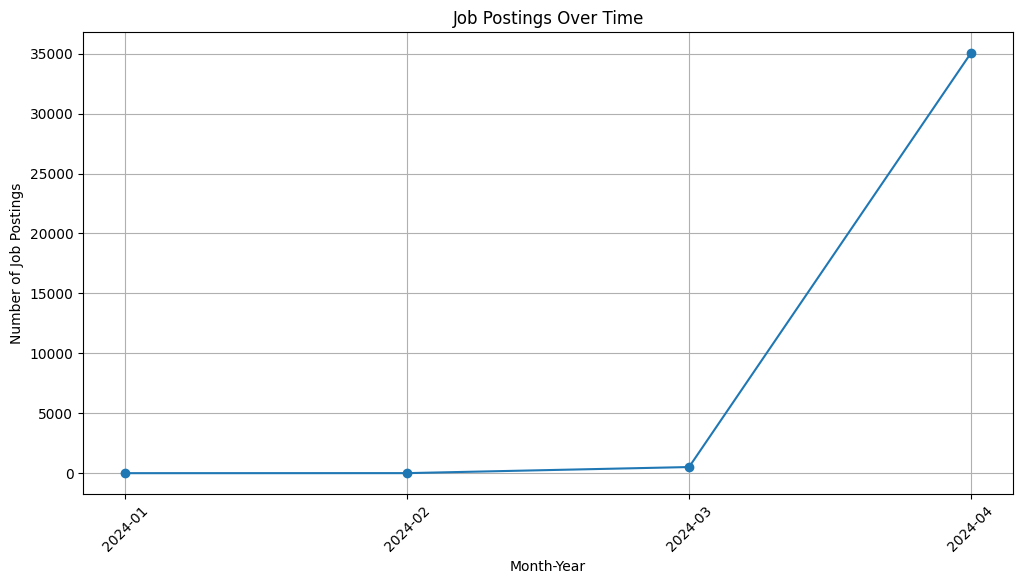

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_postings['month_year'].astype(str), monthly_postings['job_posting_count'], marker='o')
plt.title('Job Postings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Company Growth Analysis
#### **Aggregate Job Postings by Company:** Identify companies with the most job postings.

In [9]:
company_postings = postings.groupby(['company_id', 'company_name']).size().reset_index(name='job_posting_count')
top_companies = company_postings.sort_values(by='job_posting_count', ascending=False).head(50)

In [10]:
top_companies

,company_id,company_name,job_posting_count
3041,167757,The Job Network,350
886,11056,Insight Global,342
7771,18860134,Jobot,202
89,1681,Robert Half,171
3189,248184,Creative Financial Staffing (CFS),152
901,11229,Vaco,134
73,1586,Amazon,124
429,4787,Apex Systems,117
480,5235,LHH,117
5227,2396310,Randstad USA,106


In [11]:
employee_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
 3   time_recorded   35787 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [12]:
top_companies = top_companies.merge(employee_counts[['company_id', 'employee_count']], on='company_id', how='left')

In [50]:
top_companies

,company_id,company_name,job_posting_count,employee_count
0,167757,The Job Network,350,73
1,11056,Insight Global,342,14122
2,11056,Insight Global,342,14127
3,11056,Insight Global,342,14144
4,11056,Insight Global,342,14152
...,...,...,...,...
77,2396310,Randstad USA,106,8982
78,2396310,Randstad USA,106,8985
79,2396310,Randstad USA,106,8987
80,2396310,Randstad USA,106,8990


In [13]:
# Take the first occurrence of employee_count for each company
top_companies_cleaned = top_companies.drop_duplicates(subset=['company_id', 'company_name'], keep='first')

# Or for the last occurrence, you can use:
# top_companies_cleaned = top_companies.drop_duplicates(subset=['company_id', 'company_name'], keep='last')

print(top_companies_cleaned)


     company_id                             company_name  job_posting_count  \
0        167757                          The Job Network                350   
1         11056                           Insight Global                342   
12     18860134                                    Jobot                202   
20         1681                              Robert Half                171   
32       248184        Creative Financial Staffing (CFS)                152   
34        11229                                     Vaco                134   
44         1586                                   Amazon                124   
54         4787                             Apex Systems                117   
61         5235                                      LHH                117   
74      2396310                             Randstad USA                106   
82      1506196  Health Carousel Nursing & Allied Health                104   
85      2204084                             Talentif

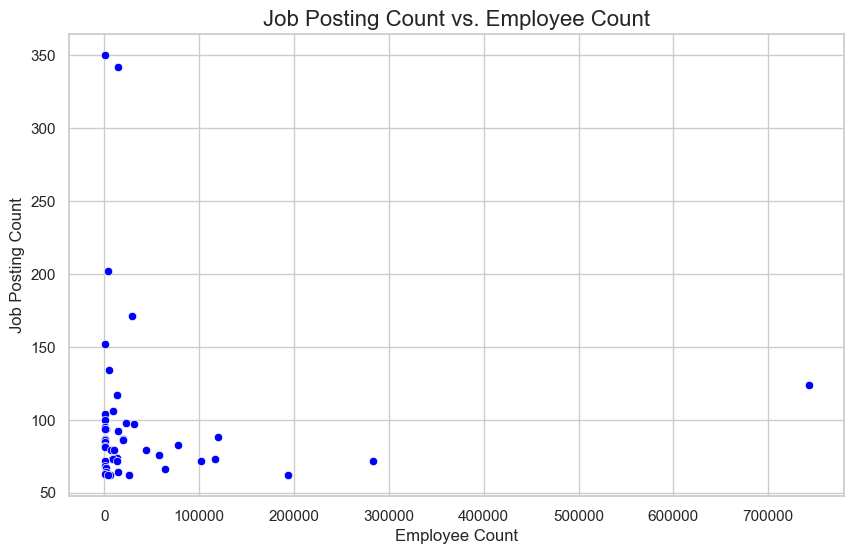

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x='employee_count', y='job_posting_count', data=top_companies_cleaned, color='blue')

# Adding labels and title
plt.title('Job Posting Count vs. Employee Count', fontsize=16)
plt.xlabel('Employee Count', fontsize=12)
plt.ylabel('Job Posting Count', fontsize=12)

# Show the plot
plt.show()


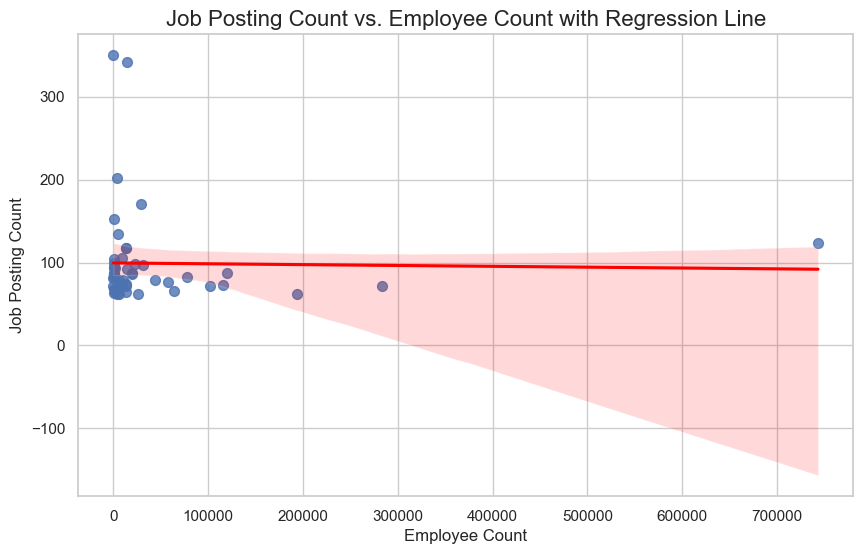

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='employee_count', y='job_posting_count', data=top_companies_cleaned, scatter_kws={'s':50}, line_kws={'color':'red'})

# Adding labels and title
plt.title('Job Posting Count vs. Employee Count with Regression Line', fontsize=16)
plt.xlabel('Employee Count', fontsize=12)
plt.ylabel('Job Posting Count', fontsize=12)

plt.show()

C:\Users\My Account\AppData\Local\Temp\ipykernel_17508\1089892033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_companies_cleaned['employee_size_bin'] = pd.cut(top_companies_cleaned['employee_count'],
C:\Users\My Account\AppData\Local\Temp\ipykernel_17508\1089892033.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line_data = top_companies_cleaned.groupby('employee_size_bin').agg({'job_posting_count': 'mean'}).reset_index()


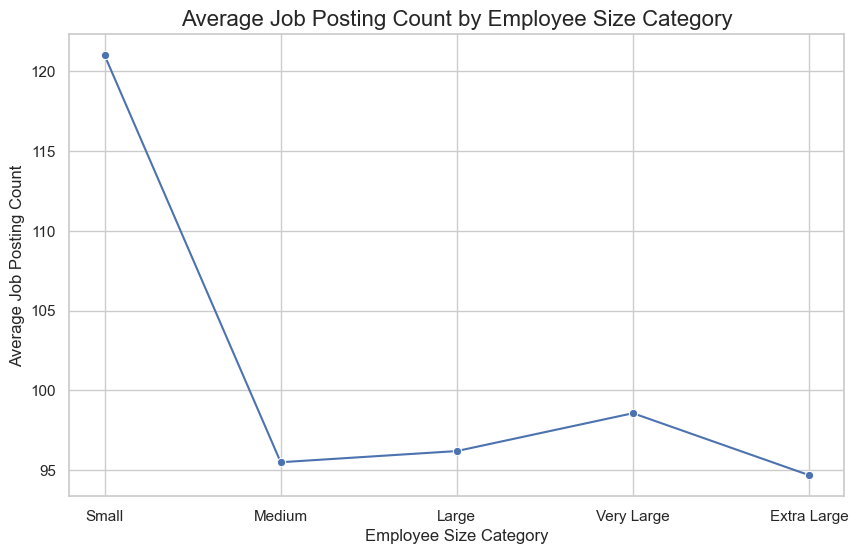

In [16]:
import pandas as pd

# Create employee size bins
top_companies_cleaned['employee_size_bin'] = pd.cut(top_companies_cleaned['employee_count'], 
                                                     bins=[0, 50, 200, 500, 1000, 5000, float('inf')],
                                                     labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large', 'Extra Large'])

# Group by the new bins and calculate the mean job postings
line_data = top_companies_cleaned.groupby('employee_size_bin').agg({'job_posting_count': 'mean'}).reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='employee_size_bin', y='job_posting_count', data=line_data, marker='o')

# Adding labels and title
plt.title('Average Job Posting Count by Employee Size Category', fontsize=16)
plt.xlabel('Employee Size Category', fontsize=12)
plt.ylabel('Average Job Posting Count', fontsize=12)

plt.show()


In [17]:
import plotly.express as px

# Create the line graph with Plotly
fig = px.line(line_data, x='employee_size_bin', y='job_posting_count', 
              title='Average Job Posting Count by Employee Size Category',
              markers=True)

# Show the plot
fig.update_layout(xaxis_title='Employee Size Category', yaxis_title='Average Job Posting Count')
fig.show()


In [71]:
import nbformat
print(nbformat.__version__)

5.10.4


In [18]:

# Create the line graph with Plotly
fig = px.line(top_companies_cleaned, 
              x='company_name', 
              y='job_posting_count', 
              title='Top 50 Companies with Highest Job Openings',
              markers=True, 
              hover_data={'employee_count': True, 'job_posting_count': True})

# Show the plot
fig.update_layout(xaxis_title='Company Name', 
                  yaxis_title='Job Posting Count')

# Show the plot
fig.show()


In [19]:
import ipywidgets as widgets
from IPython.display import display

In [20]:

# Function to create and display the plot
def plot_top_companies(num_companies):
    # Sort to get the top N companies by job posting count
    top_n_companies = top_companies_cleaned.sort_values(by='job_posting_count', ascending=False).head(num_companies)

    # Create the line graph with Plotly
    fig = px.line(top_n_companies, 
                  x='company_name', 
                  y='job_posting_count', 
                  title=f'Top {num_companies} Companies with Highest Job Openings',
                  markers=True, 
                  hover_data={'employee_count': True, 'job_posting_count': True})

    # Update layout for better display
    fig.update_layout(xaxis_title='Company Name', 
                      yaxis_title='Job Posting Count',
                      xaxis_tickangle=-45)

    # Show the plot
    fig.show()

# Create a slider for selecting the number of companies to display
num_companies_slider = widgets.IntSlider(value=100, min=10, max=100, step=10, description='Number of Companies:')
output = widgets.Output()

# Display the slider and plot
display(num_companies_slider, output)

# Update the plot when the slider value changes
def update_plot(change):
    with output:
        output.clear_output()  # Clear previous output
        plot_top_companies(change['new'])

# Attach the update function to the slider
num_companies_slider.observe(update_plot, names='value')

# Initial plot
plot_top_companies(num_companies_slider.value)


IntSlider(value=100, description='Number of Companies:', min=10, step=10)

Output()